In [1]:
from sklearn.metrics import normalized_mutual_info_score, accuracy_score
import numpy as np
import torch
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
import re
import seaborn as sns

In [2]:
purity = 1.0
coverage = 100
general_folder_gmm = f"./new_model/results/p_{str(purity).replace('.', '')}_cov_{coverage}/"
general_folder_kmeans = f"./new_model_kmeans/results/p_{str(purity).replace('.', '')}_cov_{coverage}/"

N_values = [5000, 10000, 15000]
K_values = [4, 6, 8]
D_values = [2, 3, 4]

# NMI

#### NMI of final inference

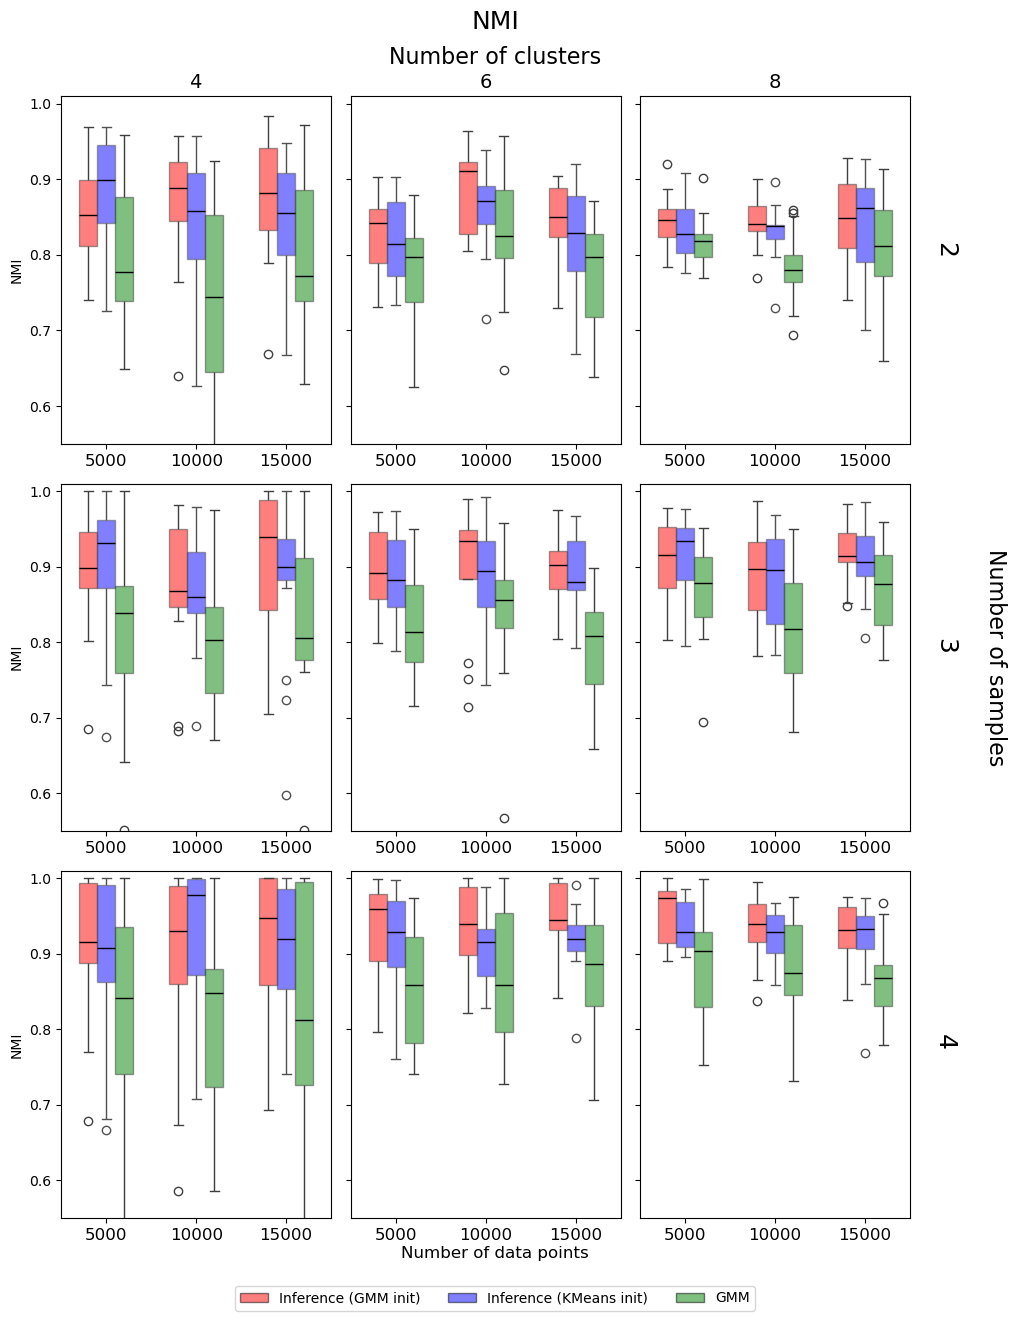

In [53]:
nmi_gmm = []
nmi_kmeans = []
nmi_gmm_init = []
def read_nmi_file(filename):
    try:
        with open(filename, 'r') as file:
            nmi_values = [float(line.strip()) for line in file.readlines()]
        return nmi_values
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        return []

for N in N_values:
    for K in K_values:
        for D in D_values:
            # Construct the filename based on the pattern
            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm = read_nmi_file(filename)
            if nmi_values_gmm:
                for nmi in nmi_values_gmm:
                    nmi_gmm.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
            if D == 2:
                filename = os.path.join(general_folder_kmeans, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_kmeans, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_kmeans, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_kmeans = read_nmi_file(filename)
            if nmi_values_kmeans:
                for nmi in nmi_values_kmeans:
                    nmi_kmeans.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })

            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm_init = read_nmi_file(filename)
            if nmi_values_gmm_init:
                for nmi in nmi_values_gmm_init:
                    nmi_gmm_init.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
df_gmm = pd.DataFrame(nmi_gmm)
df_gmm_init = pd.DataFrame(nmi_gmm_init)
df_kmeans = pd.DataFrame(nmi_kmeans)
# df
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)
axes = axes.flatten()
for i, (D) in enumerate(D_values):
    for j, (K) in enumerate(K_values):
        ax = axes[i * 3 + j]
        subset_gmm = df_gmm[(df_gmm['K'] == K) & (df_gmm['D'] == D)]
        subset_kmeans = df_kmeans[(df_kmeans['K'] == K) & (df_kmeans['D'] == D)]
        subset_gmm_init = df_gmm_init[(df_gmm_init['K'] == K) & (df_gmm_init['D'] == D)]
        
        # Calculate the unique values of N
        unique_n_values = subset_gmm['N'].unique()
        # n_positions_gmm = range(len(unique_n_values))
        n_positions_gmm = [pos - 0.2 for pos in range(len(unique_n_values))]
        n_positions_kmeans = [pos + 0.2 for pos in n_positions_gmm]
        n_positions_gmm_init = [pos + 0.2 for pos in n_positions_kmeans]
        

        # Create the boxplot for GMM with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm, ax=ax,
            positions=n_positions_gmm,
            boxprops=dict(facecolor='red', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )

        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_kmeans, ax=ax,
            positions=n_positions_kmeans,
            boxprops=dict(facecolor='blue', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )
        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm_init, ax=ax,
            positions=n_positions_gmm_init,
            boxprops=dict(facecolor='green', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )
        
        # Set custom x-tick labels for the combined plot
        ax.set_xticks([pos + 0.2 for pos in n_positions_gmm])  # Center the labels
        ax.set_xticklabels(
            ['5000',  '10000',  '15000'], fontsize=12
        )
        ax.set_xlabel('')
        ax.set_ylabel('NMI')

for i, K in enumerate(K_values):
    axes[1*i].set_title(f'{K}', fontsize=14)

# For the right column: Number of samples (D = 2, 3, 4)
for i, D in enumerate(D_values):
    # Position each D label on the right side of the subplots, vertically
    fig.text(0.95, 0.84 - i * 0.33, f'{D}', va='center', ha='center', rotation=-90, fontsize=18)

plt.ylim([0.55, 1.01])
fig.text(0.5, 1.03, 'NMI', ha='center', va='center', fontsize=18)
fig.text(0.5, 1., 'Number of clusters', ha='center', va='center', fontsize=16)
fig.text(1., 0.5, 'Number of samples', ha='center', va='center', rotation=-90, fontsize=16)
fig.text(0.5, 0.00001, 'Number of data points', ha='center', fontsize=12)
# plt.savefig('nmi_gmm.pdf', format='pdf')
# plt.savefig('nmi_gmm.png')

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

# Distribution accuracy per cluster

In [28]:
def compute_pairwise_nmi(true_labels, predicted_labels, threshold=0.5):
    unique_true = np.unique(np.array(true_labels, dtype = 'int'))
    unique_pred = np.unique(predicted_labels)
    # Initialize mapping and NMI matrix
    nmi_matrix = np.zeros((len(unique_true), len(unique_pred)))
    label_mapping = {}
    
    # Construct pairwise NMI matrix
    # Rows: true labels, Columns: predicted labels
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            true_mask = (true_labels == true_label).astype(int)
            pred_mask = (predicted_labels == pred_label).astype(int)
            
            nmi_matrix[i, j] = normalized_mutual_info_score(true_mask, pred_mask)
    
    # Select the best matching predicted label for each true label
    for i, true_label in enumerate(unique_true):
        best_pred_index = np.argmax(nmi_matrix[i, :])  # Index of the best match (i.e. column)
        best_nmi = nmi_matrix[i, best_pred_index]

        if best_nmi >= threshold:
            label_mapping[true_label] = unique_pred[best_pred_index]

    return label_mapping, nmi_matrix  

GMM final inference

In [29]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

KMeans final inference

In [30]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_kmeans = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_kmeans + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_kmeans[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

GMM init

In [48]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_gmm_init = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/init_csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_gmm_init[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

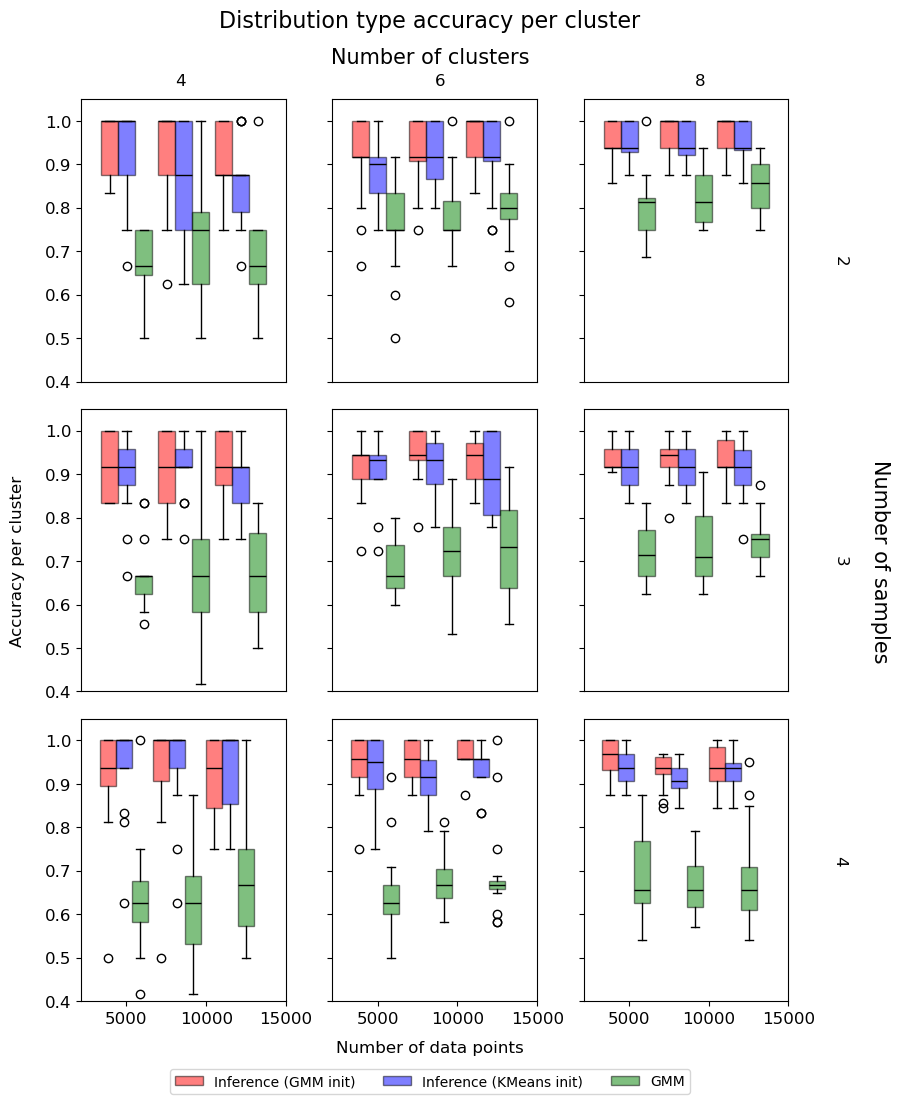

In [ ]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_gmm = []
        all_metrics_kmeans = []
        all_metrics_gmm_init = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(accuracy_gmm.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm.append(metrics_gmm)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_kmeans = np.array(accuracy_kmeans.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_kmeans.append(metrics_kmeans)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm_init = np.array(accuracy_gmm_init.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm_init.append(metrics_gmm_init)

        if any(metrics.size > 0 for metrics in all_metrics_gmm + all_metrics_kmeans):
            # Adjusted positions for six boxplots
            # n_positions_gmm = np.arange(len(N_values)) - 0.1
            # n_positions_kmeans = n_positions_gmm + 0.3
            # n_positions_gmm_init = n_positions_kmeans + 0.3
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_gmm = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_kmeans = base_positions  # KMeans boxplots centered
            n_positions_gmm_init = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for GMM
            box_gmm = ax.boxplot(
                all_metrics_gmm, 
                positions=n_positions_gmm, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for KMeans
            box_kmeans = ax.boxplot(
                all_metrics_kmeans, 
                positions=n_positions_kmeans, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_kmeans['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_kmeans['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for GMM init
            box_gmm_init = ax.boxplot(
                all_metrics_gmm_init, 
                positions=n_positions_gmm_init, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm_init['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm_init['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # # Add scatter points for individual data points (GMM)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_gmm, n_positions_gmm)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # # Add scatter points for individual data points (KMeans)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_kmeans, n_positions_kmeans)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                ax.set_xticks((n_positions_gmm + n_positions_kmeans + n_positions_gmm_init) / 3)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per cluster', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.4, 1.05])
plt.show()


# Distribution accuracy per single data point

In [3]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_gmm_init = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/init_csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_gmm_init[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

In [4]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

In [5]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_kmeans = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_kmeans + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_kmeans[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

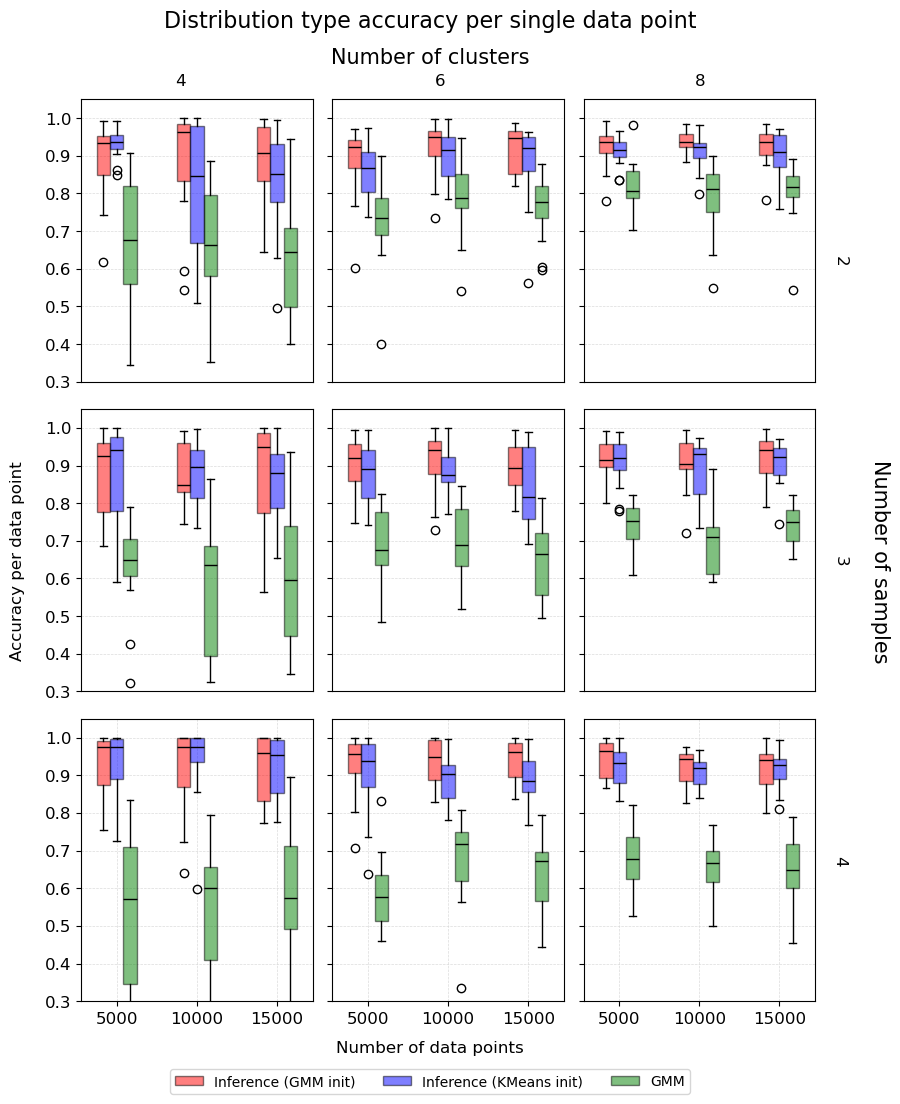

In [40]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]
        # Add a light gray grid to all subplots
        
        

        all_metrics_gmm = []
        all_metrics_kmeans = []
        all_metrics_gmm_init = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(acc_data_points_gmm.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm.append(metrics_gmm)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_kmeans = np.array(acc_data_points_kmeans.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_kmeans.append(metrics_kmeans)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm_init = np.array(acc_data_points_gmm_init.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm_init.append(metrics_gmm_init)

        if any(metrics.size > 0 for metrics in all_metrics_gmm + all_metrics_kmeans):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_gmm = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_kmeans = base_positions  # KMeans boxplots centered
            n_positions_gmm_init = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for GMM
            box_gmm = ax.boxplot(
                all_metrics_gmm, 
                positions=n_positions_gmm, 
                # notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for KMeans
            box_kmeans = ax.boxplot(
                all_metrics_kmeans, 
                positions=n_positions_kmeans, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_kmeans['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_kmeans['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for GMM init
            box_gmm_init = ax.boxplot(
                all_metrics_gmm_init, 
                positions=n_positions_gmm_init, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm_init['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm_init['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # # Add scatter points for individual data points (GMM)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_gmm, n_positions_gmm)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # # Add scatter points for individual data points (KMeans)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_kmeans, n_positions_kmeans)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                x_tick_positions = (n_positions_gmm + n_positions_kmeans + n_positions_gmm_init) / 3
                ax.set_xticks(x_tick_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])
            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per single data point', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per data point', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.3, 1.05])
plt.show()
